<a href="https://colab.research.google.com/github/avigangarde/OIBSIP/blob/main/Task_1_CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **CAR** **PRICE** **PREDICTION** **WITH** **MACHINE** **LEARNING**


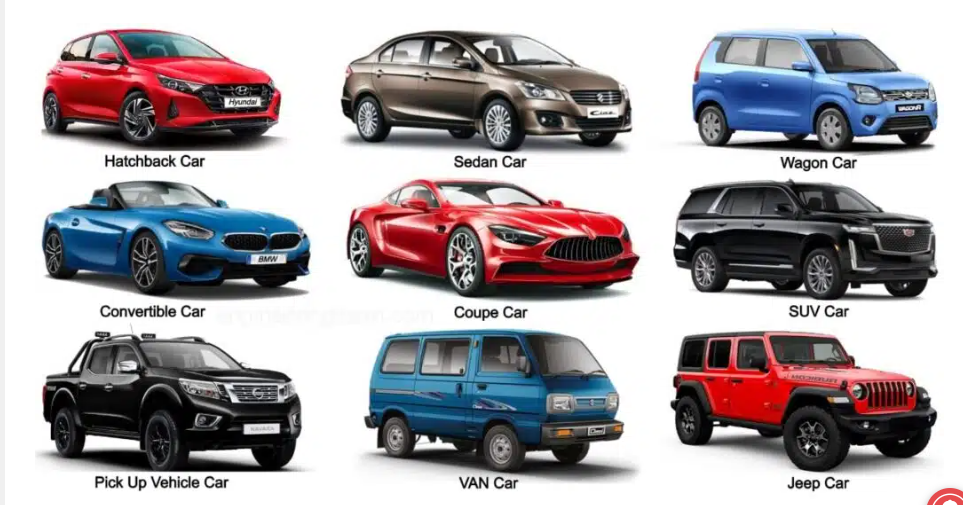

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Gangarde Avinash B


# **Project Summary -**

The goal of this project is to predict car prices and identify the specifications or features that impact the car price. We have been provided with a labeled dataset containing information about various car attributes and their corresponding prices.

To achieve this objective, we will begin with an exploratory data analysis (EDA) to gain insights into the dataset's structure and relationships between features and the target variable (car price). We will select relevant features such as make, model, year, mileage, condition, and others based on statistical analysis and domain knowledge.

Next, we will choose an appropriate machine learning model for regression tasks, such as linear regression, decision trees, or random forests. The selected model will be trained using the labeled dataset, allowing it to learn the relationships between the chosen features and car prices.

We will evaluate the performance of the trained model using a testing set, using metrics such as mean squared error (MSE) or mean absolute error (MAE). Additionally, we will perform feature importance analysis to determine which specifications or features have the most significant impact on car prices. This analysis will provide valuable insights into the factors driving car prices.

The project's outcome will be a prediction model capable of estimating car prices accurately. Moreover, we will identify the key specifications or features that strongly influence the car price, enabling stakeholders to make informed decisions regarding pricing, marketing, and product development.

By leveraging this predictive model and understanding the impact of different specifications on car prices, businesses can optimize their pricing strategy, improve competitiveness, and better meet customer preferences in the automotive market.

# **GitHub Link -**[Project link](https://github.com/avigangarde/OIBSIP/blob/main/Task_1_CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING_ipynb.ipynb)

# **Problem Statement**


In this scenario, you have been provided with a labeled dataset, which means that each data point in the dataset includes both input features (specifications) and the corresponding output variable (car price). The objective is to develop a predictive model that can accurately estimate car prices based on the given specifications/features. Additionally, the goal is to identify which specific specifications or features have a significant impact on the car price.

#### **Define Your Business Objective?**

Business Objective: Optimizing Car Pricing Strategy

The primary business objective for the car price prediction project could be to optimize the car pricing strategy of a company. By accurately predicting car prices, the company can make data-driven decisions to set competitive and profitable prices for their vehicles. This objective can be further broken down into specific goals:

Accurate Pricing: Develop a robust and reliable car price prediction model that can accurately estimate the market value of vehicles based on various factors such as make, model, year, mileage, condition, and additional features.

Competitive Pricing: Utilize the car price predictions to set competitive prices for different car models compared to competitors. The objective is to find the sweet spot where prices are attractive to customers while ensuring profitability for the company.

Market Insights: Gain valuable insights into customer preferences and purchasing patterns by analyzing the factors that significantly influence car prices. This knowledge can help the company understand which features and characteristics have the highest impact on price, enabling them to optimize their product offerings.

Inventory Management: Improve inventory management by predicting demand and adjusting prices accordingly. By analyzing historical sales data and market trends, the company can make informed decisions about stocking and pricing specific models to minimize inventory holding costs and maximize sales.

Customer Segmentation: Leverage the car price prediction model to segment customers based on their price sensitivity and preferences. This segmentation can be used to tailor marketing and promotional strategies, offering personalized deals and incentives to different customer groups.

Pricing Optimization: Continuously refine the car price prediction model based on real-time market data, customer feedback, and sales performance. Implement pricing optimization strategies to adapt to changing market dynamics, customer behavior, and economic factors.

Overall, the business objective is to enhance the company's pricing strategy by leveraging data-driven car price predictions, thereby increasing competitiveness, improving profitability, and better meeting the needs of customers in the automotive market.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.3 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df=pd.read_csv("/content/drive/MyDrive/Oasis Infobyte dataset/CAR PRICE PREDICTION WITH MACHINE LEARNING.csv")

In [ ]:
# take a first look at dataset
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(205, 26)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

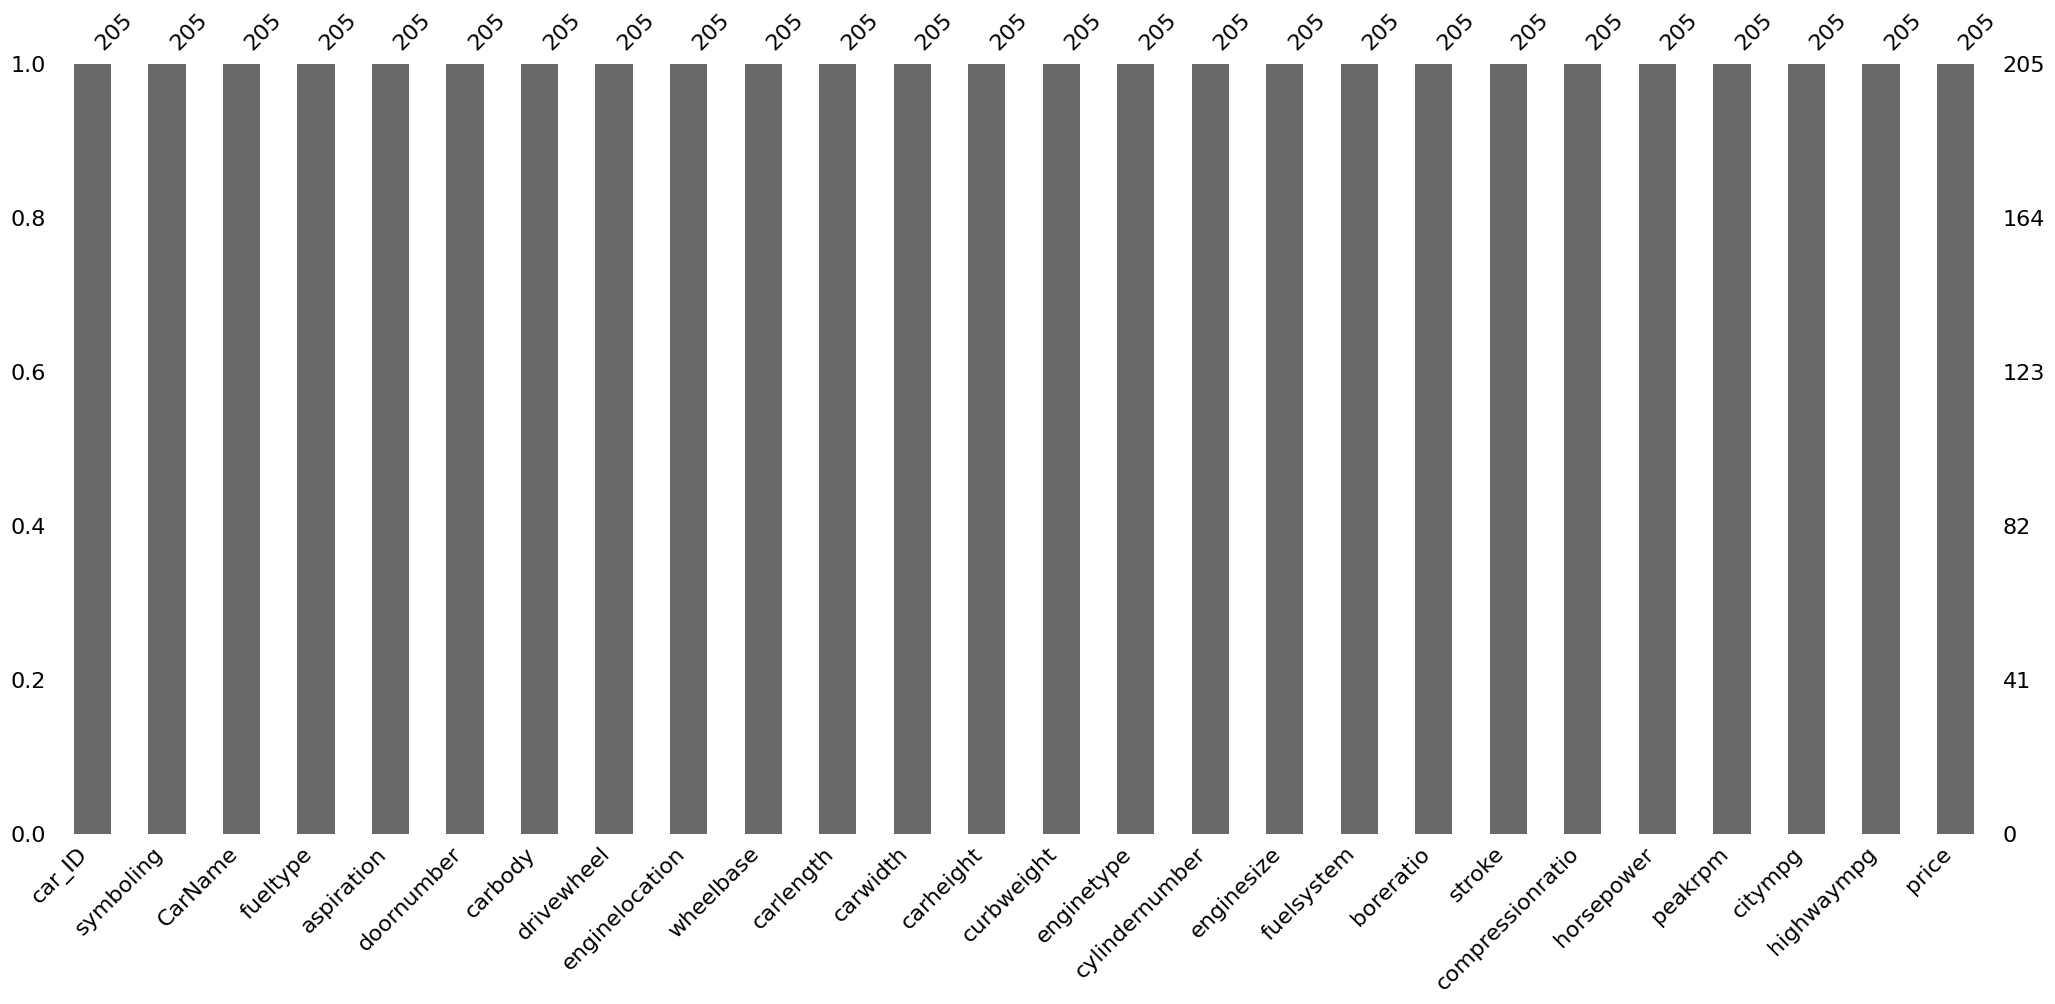

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

1. The given data set has 206 rows and 26 columns.
2. The dataset contains zero null values and zero duplicate rows.
3. The dataset has 10 columns with object data types or string data type  and 16 columns with numerical types of data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Variables Description 

The terms mentioned correspond to various attributes or variables related to car information. Here's a description of each term:

**Car_ID**: It refers to a unique identifier assigned to each car in the dataset. This ID distinguishes one car from another.

**Symboling**: Symboling represents the insurance risk rating of a car. It is an industry-standard rating that indicates the level of risk associated with insuring a particular vehicle. The symboling scale typically ranges from -3 to +3, where negative values indicate a higher risk and positive values indicate a lower risk.

**CarName**: CarName represents the name or brand of the car. It specifies the manufacturer or the model of the vehicle.

**Fueltype**: Fueltype describes the type of fuel the car uses. It can be either "gas" (petrol) or "diesel."

**Aspiration**: Aspiration refers to the method used to induce air into the car's engine. It can be either "std" (naturally aspirated) or "turbo" (turbocharged).

**Doornumber**: Doornumber indicates the number of doors the car has. It can be "two" or "four."

**Carbody**: Carbody represents the body style or design of the car, such as sedan, hatchback, convertible, wagon, etc.

**Drivewheel**: Drivewheel specifies the type of wheel that provides power and moves the car. It can be front-wheel drive (FWD), rear-wheel drive (RWD), or four-wheel drive (4WD).

**Enginelocation**: Enginelocation describes the placement of the car's engine. It can be either "front" or "rear."

**Wheelbase**: Wheelbase refers to the distance between the centers of the front and rear wheels. It is an important parameter that influences the stability and handling of the vehicle.

**Carwidth**: Carwidth represents the width of the car, typically measured in millimeters (mm). It indicates the width of the body, including the exterior mirrors.

**Carheight**: Carheight denotes the height of the car, usually measured in millimeters (mm). It refers to the vertical measurement from the ground to the highest point of the vehicle.

**Curbweight**: Curbweight indicates the weight of the car without any occupants or cargo. It includes the weight of all standard equipment, fluids, and fuel.

**Enginetype**: Enginetype specifies the configuration or type of the car's engine, such as "ohc" (overhead camshaft), "ohcf" (overhead camshaft and cam follower), "dohc" (dual overhead camshaft), and so on.

**Cylindernumber**: Cylindernumber refers to the number of cylinders in the car's engine. It can be represented as a numerical value, such as 4, 6, or 8.

**Enginesize**: Enginesize indicates the displacement volume of the car's engine. It represents the total capacity of all cylinders and is typically measured in cubic centimeters (cc) or liters (L).

**Fuelsystem**: Fuelsystem represents the type of fuel delivery system used in the car, such as "mpfi" (multi-point fuel injection), "2bbl" (two-barrel carburetor), "4bbl" (four-barrel carburetor), and so on.

**Boreratio**: Boreratio refers to the ratio between the diameter of the engine cylinder and the piston stroke length. It influences the engine's performance and efficiency.

**Stroke**: Stroke represents the length of the piston stroke in the engine, indicating the distance traveled by the piston

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

<Figure size 1000x800 with 0 Axes>

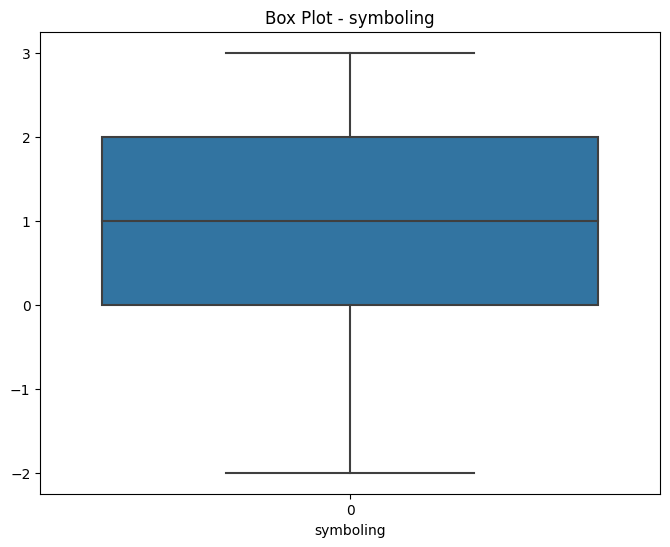

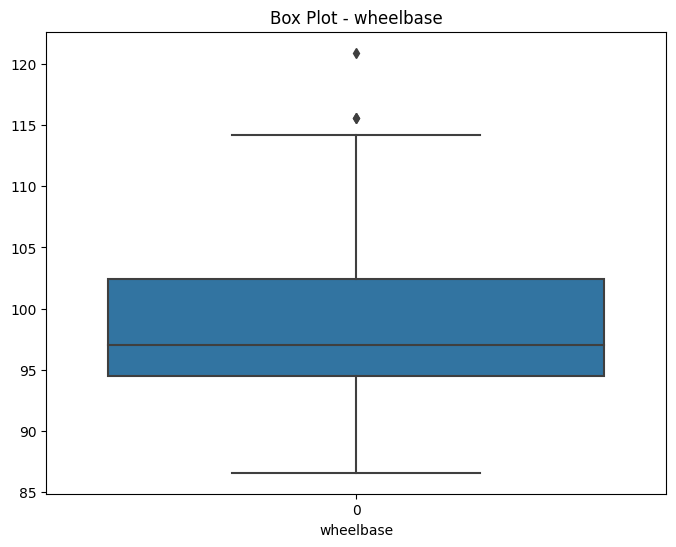

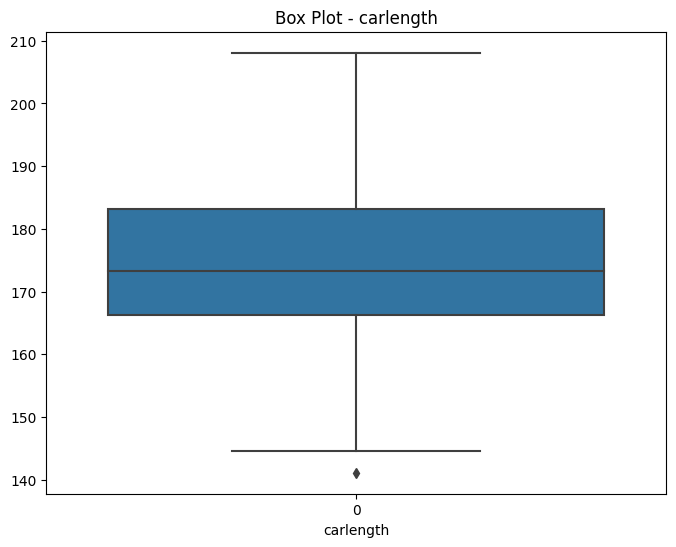

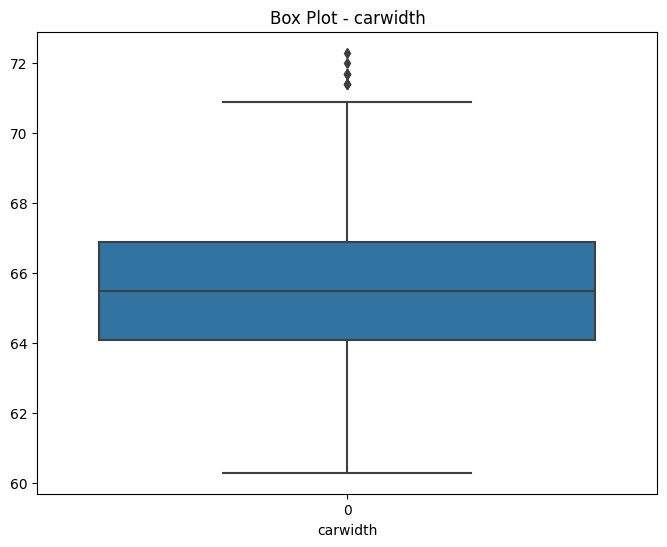

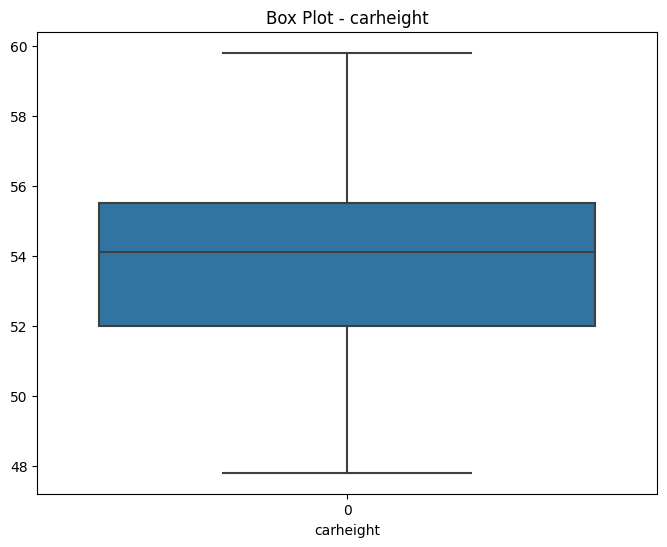

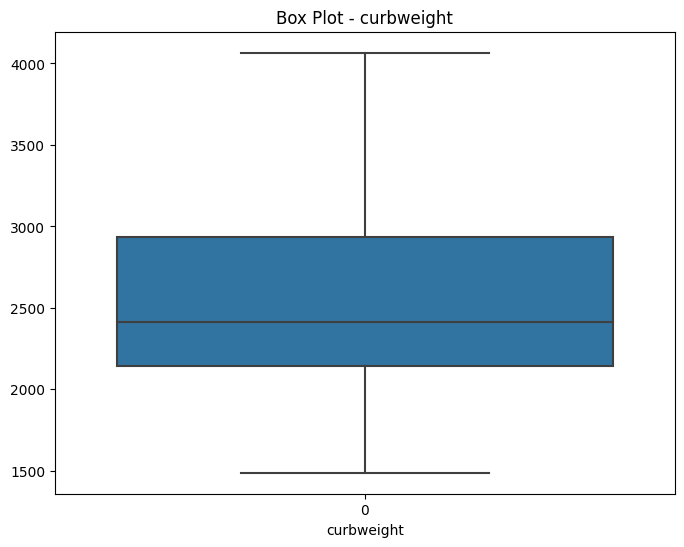

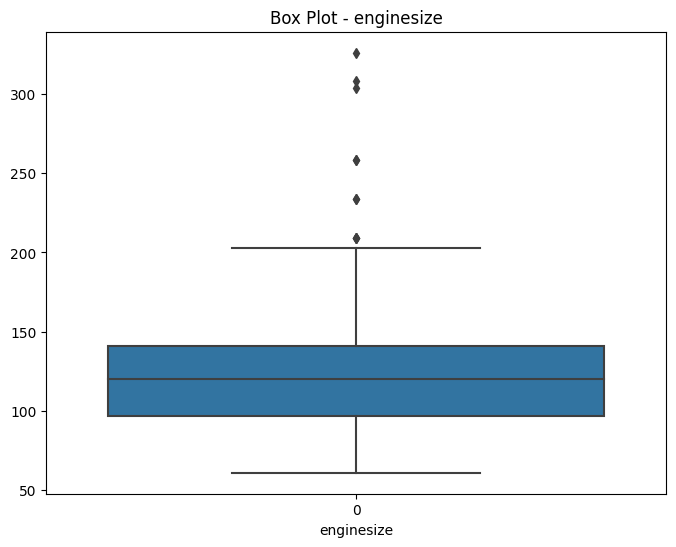

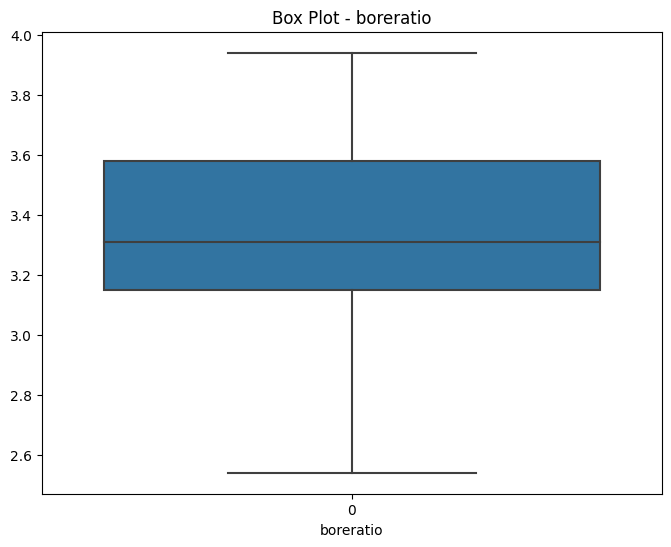

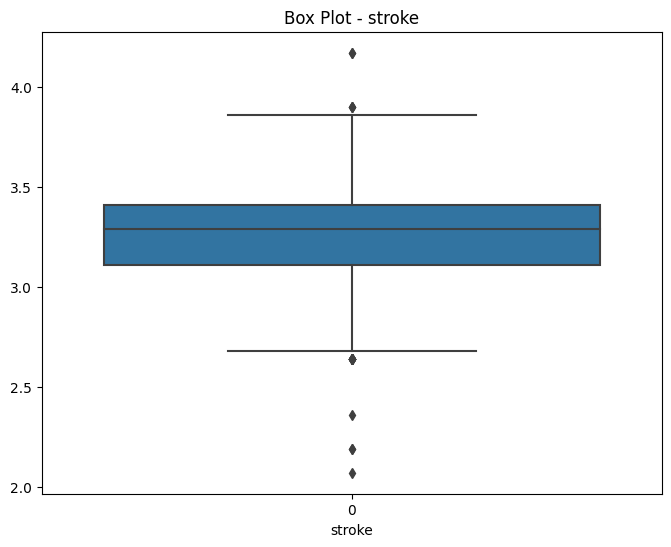

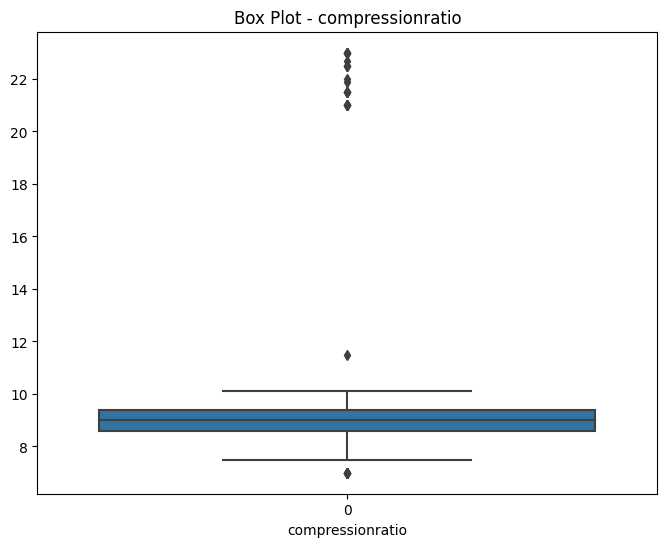

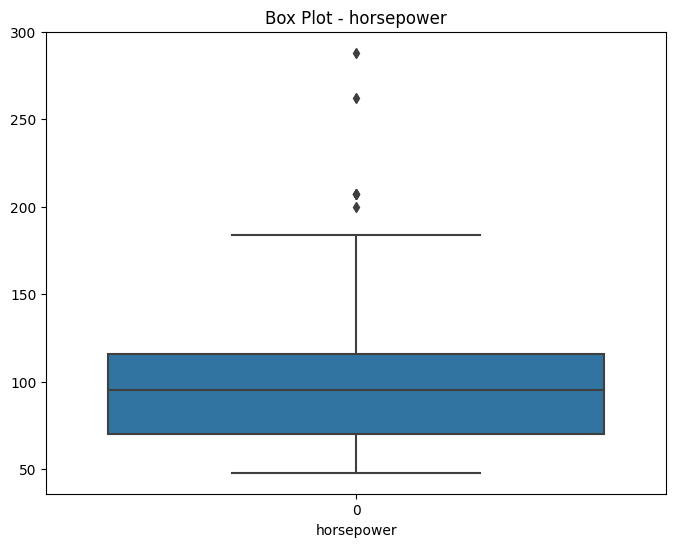

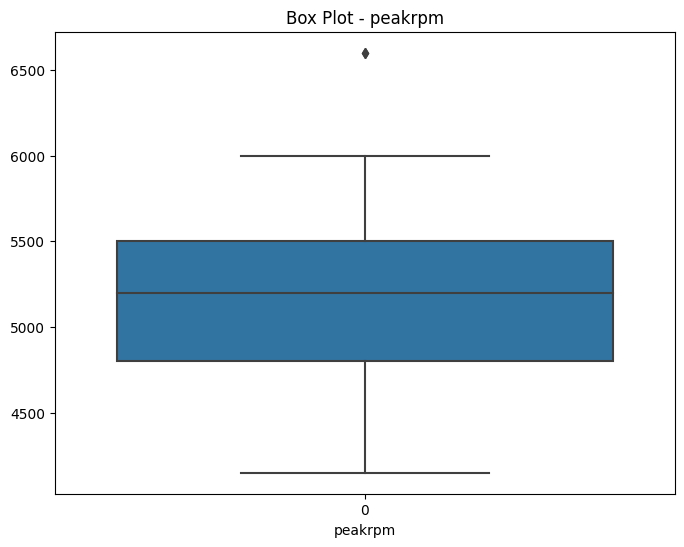

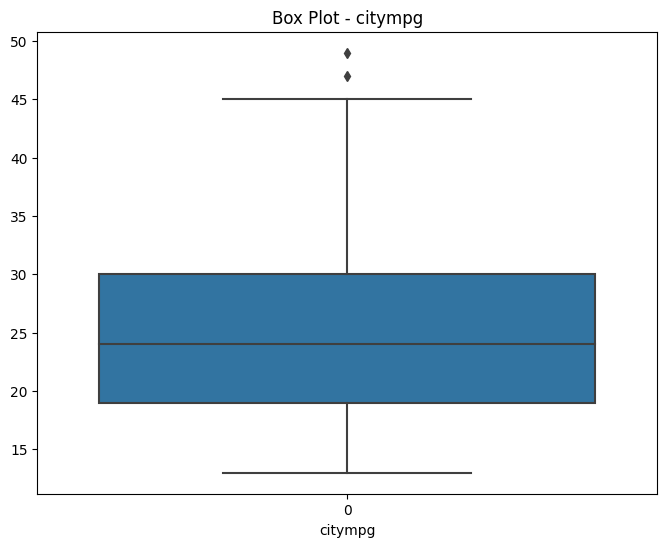

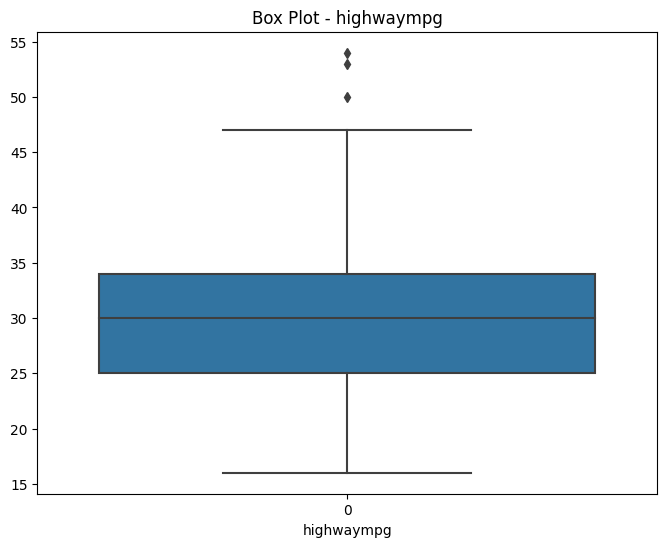

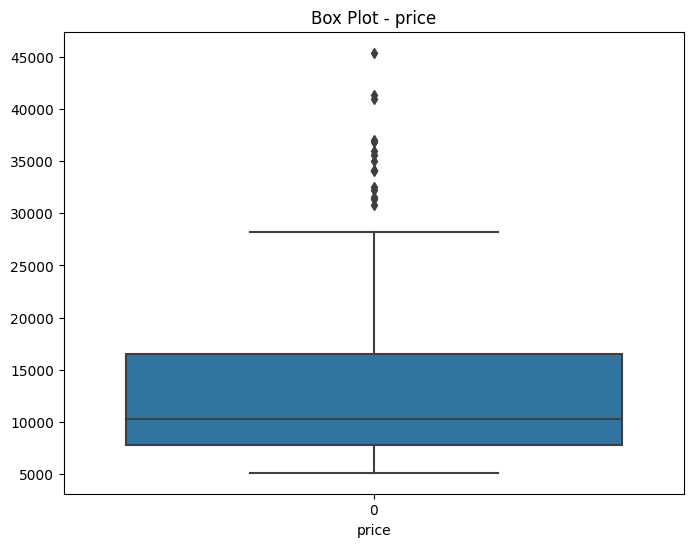

In [ ]:
# Create a list of variables to check for outliers
variables = ['symboling', 'wheelbase',
             'carlength', 'carwidth', 'carheight', 'curbweight',
              'enginesize',  'boreratio', 'stroke',
             'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
             'price']
# Create a box plot for each variable
plt.figure(figsize=(10, 8))
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[variable])
    plt.title(f'Box Plot - {variable}')
    plt.xlabel(variable)
    plt.show()

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

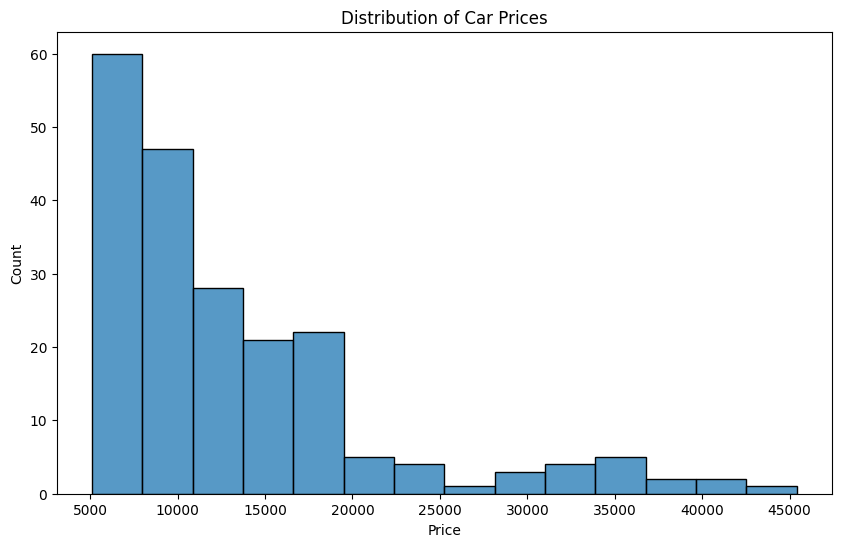

In [ ]:
# Chart - 1 visualization code
# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.The majority of cars in the given dataset have prices ranging from $5,000 to $20,000.

2.This price range represents a significant portion of the dataset, indicating that cars in this range are more common.

3.The dataset contains cars with prices higher than $20,000, but they are less prevalent compared to the majority.

4.The maximum price observed in the dataset is $45,400, suggesting the presence of higher-priced cars, although they are less frequent.

5.Understanding the price distribution in the dataset helps analyze the market segment and make informed decisions regarding pricing, marketing, and product development.


#### Chart - 2

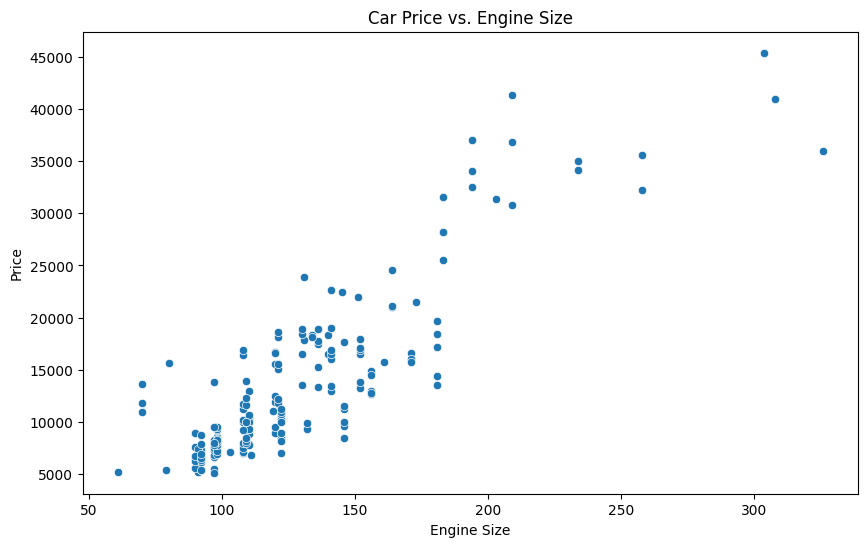

In [ ]:
# Chart - 2 visualization code
# Visualize the relationship between car prices and engine size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enginesize', y='price')
plt.title('Car Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.The scatter plot analysis shows a positive correlation between engine size and car price.

2.As the engine size increases, there is a corresponding increase in the price of the car.

3.Larger engines, which typically offer more power and performance, are associated with higher-priced cars.

4.Customers are willing to pay a premium for cars with larger engines due to the perceived value and benefits they offer.

5.The scatter plot helps visualize the positive relationship between engine size and car price.

This information is valuable for car manufacturers, dealerships, and buyers in making pricing decisions and understanding the impact of engine size on car prices.

#### Chart - 3

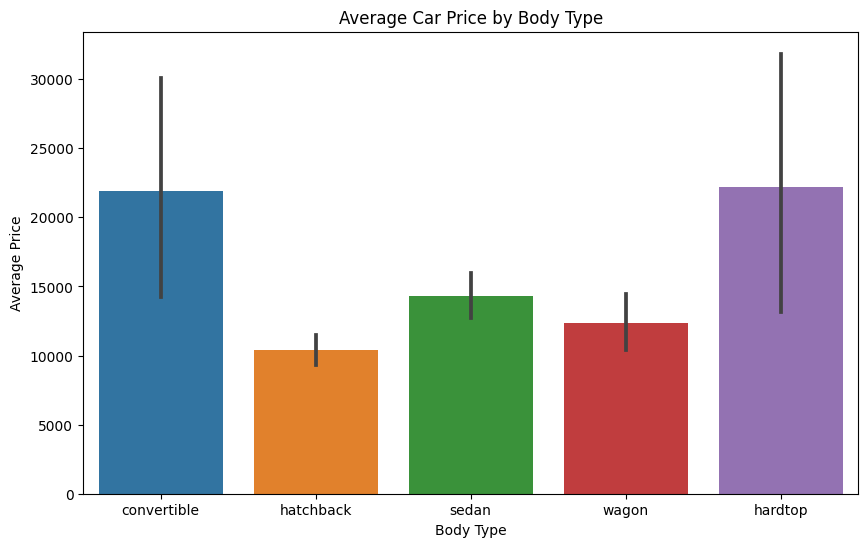

In [ ]:
# Chart - 3 visualization code
# Visualize the average car price by car body type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='carbody', y='price')
plt.title('Average Car Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

**Convertible**: The average price for a convertible car is $22,000. Convertibles are known for their open-top design and are often associated with a sporty or luxurious image. The higher price range for convertibles may reflect the additional features, performance, and desirability that come with this type of car.


**Hatchback**: Hatchbacks have an average price of $10,000. Hatchbacks are known for their practicality, compact size, and versatile cargo space. They are often favored for their affordability and fuel efficiency. The lower price range for hatchbacks could be attributed to their compact design and target market of budget-conscious buyers.

**Sedan**: Sedans have an average price of $14,000. Sedans are characterized by their four-door configuration and ample passenger space. They are popular for their comfort, convenience, and versatility. The moderate price range for sedans reflects their wider market appeal and the range of features and options available.

**Wagon**: The average price for a wagon is $12,000. Wagons are known for their extended cargo space and practicality, making them suitable for families or individuals with a need for extra storage. The price range for wagons reflects their utility and functionality, offering a balance between affordability and versatility.

**Hardtop**: Hardtop cars also have an average price of $22,000. Hardtops typically refer to cars with a solid, fixed roof structure. The higher price range for hardtops may be associated with their design, build quality, and potential for enhanced performance or luxury features.

#### Chart - 4

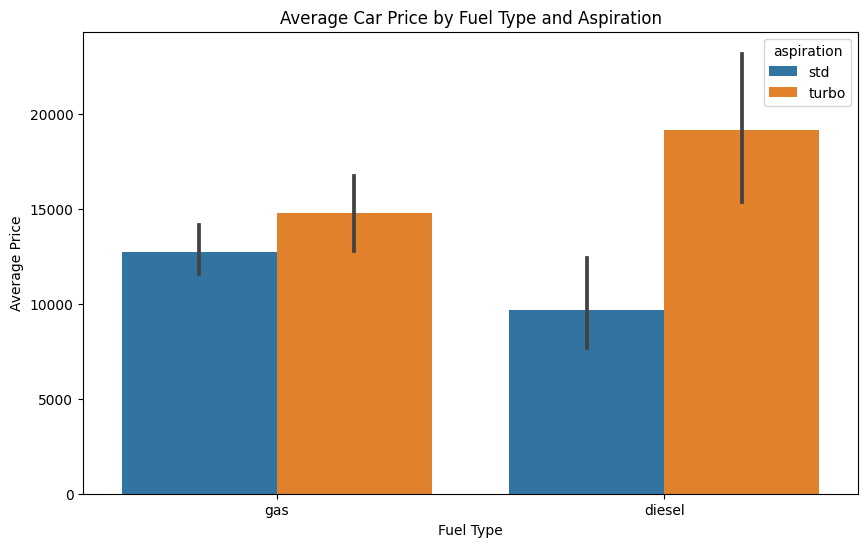

In [ ]:
# Chart - 4 visualization code
# Compare the average car prices based on the fuel type and aspiration.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='fueltype', y='price', hue='aspiration')
plt.title('Average Car Price by Fuel Type and Aspiration')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Average price of gasoline car with standard aspiration: $13,000

Indicates typical pricing range for this type of car

Gasoline cars with standard aspiration tend to fall within this price range

2.Average price of gasoline car with turbo aspiration: $15,000

Reflects higher pricing compared to gasoline cars with standard aspiration

Gasoline cars with turbo aspiration generally have enhanced performance

Represents the typical pricing range for this specific type of car

3.Average price of diesel car with standard aspiration: $9,000

Diesel cars with standard aspiration have a lower price compared to gasoline cars

Represents the typical pricing range for diesel cars with standard aspiration

4.Average price of diesel car with turbo aspiration: $18,000

Diesel cars with turbo aspiration have a higher price compared to gasoline cars

Diesel cars with turbo aspiration typically offer increased power and performance

Represents the typical pricing range for diesel cars with turbo aspiration

#### Chart - 5

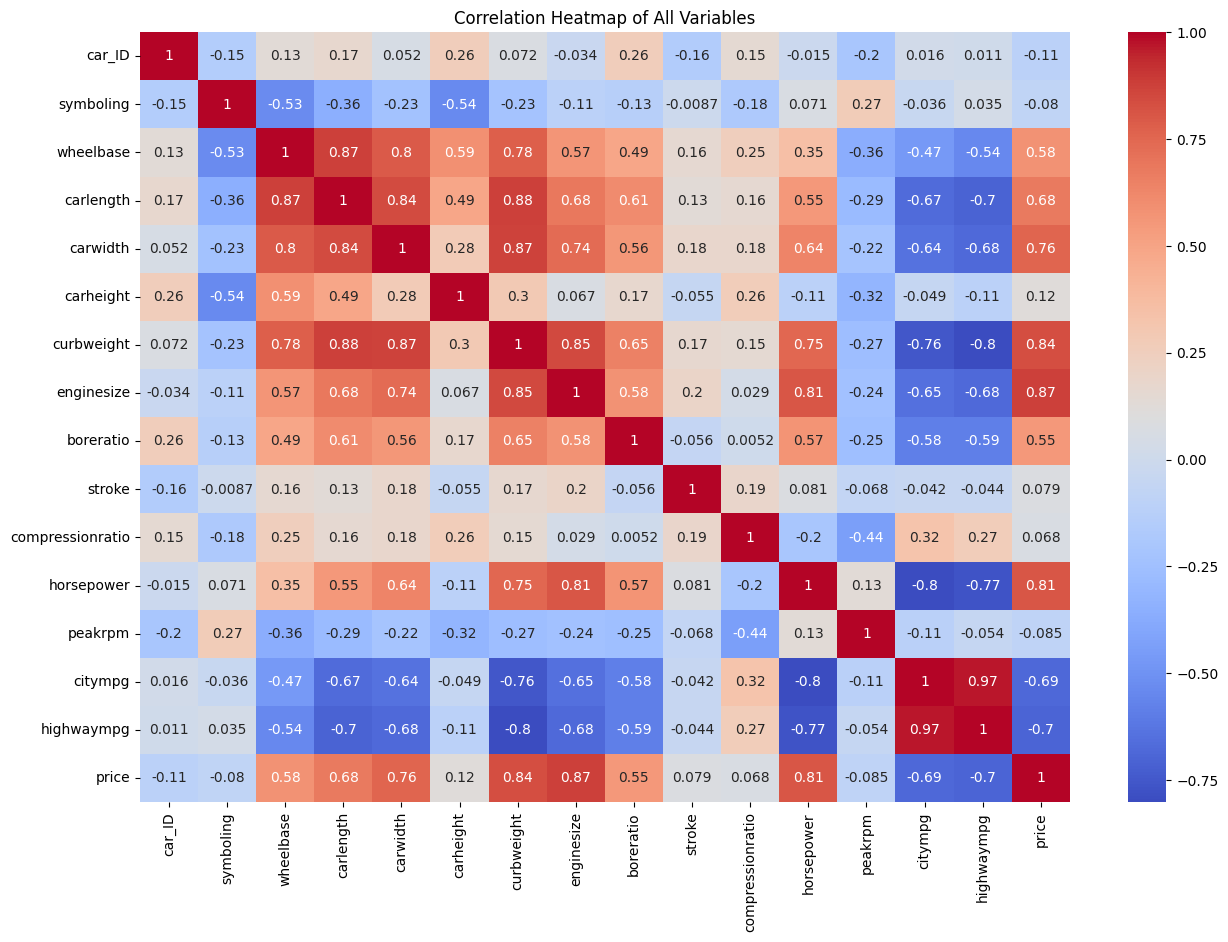

In [ ]:
# Explore the correlation between numeric variables related to car prices.
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()  # Compute the correlation matrix for all variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of All Variables')
plt.show()

1.Correlation coefficient between engine size and horsepower: 0.81

a.Strong positive relationship

b.As engine size increases, horsepower tends to increase

c.Engine size is a significant factor in determining horsepower


2.Correlation coefficient between engine size and price: 0.87

a.Strong positive relationship

b.As engine size increases, price tends to increase

c.Larger engine sizes are associated with higher-priced cars

d.Engine size is a crucial determinant of car price


3.Correlation coefficient between price and horsepower: 0.81

a.Strong positive relationship

b.As horsepower increases, price tends to increase

c.Horsepower plays a significant role in determining car price



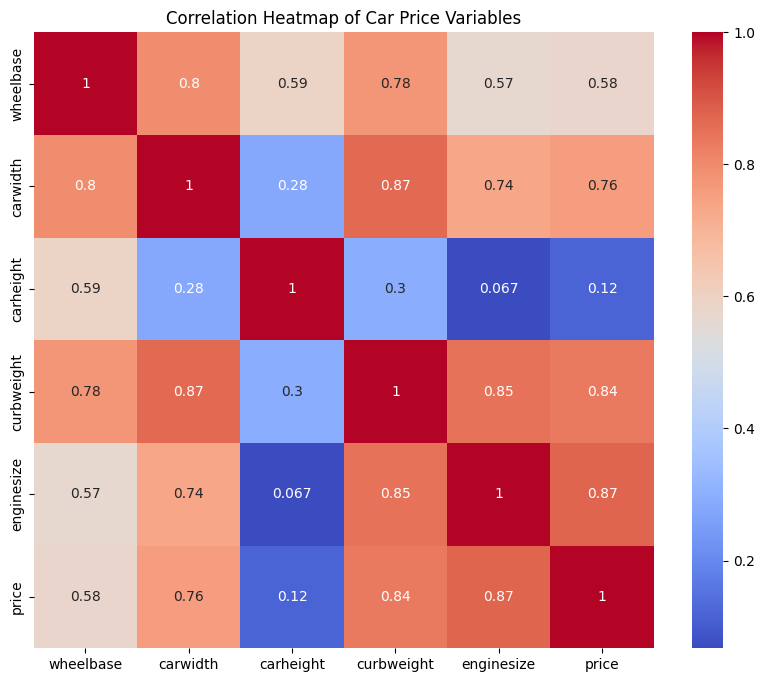

In [ ]:
# Chart - 5 visualization code
# Explore the correlation between numeric variables related to car prices.
plt.figure(figsize=(10, 8))
corr_matrix = df[['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Car Price Variables')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.The heatmap analysis reveals strong correlations between certain variables and the car price.

2.The variable "curbweight" demonstrates a significant positive correlation coefficient of 0.84 with the price.

3.Higher curb weight is associated with higher car prices.

4.The variable "carwidth" shows a moderate positive correlation coefficient of 0.76 with the price.

4.Wider car width tends to be associated with higher prices.

5.The variable "wheel base" has a weaker positive correlation coefficient of 0.58 with the price.

#### Chart - 6

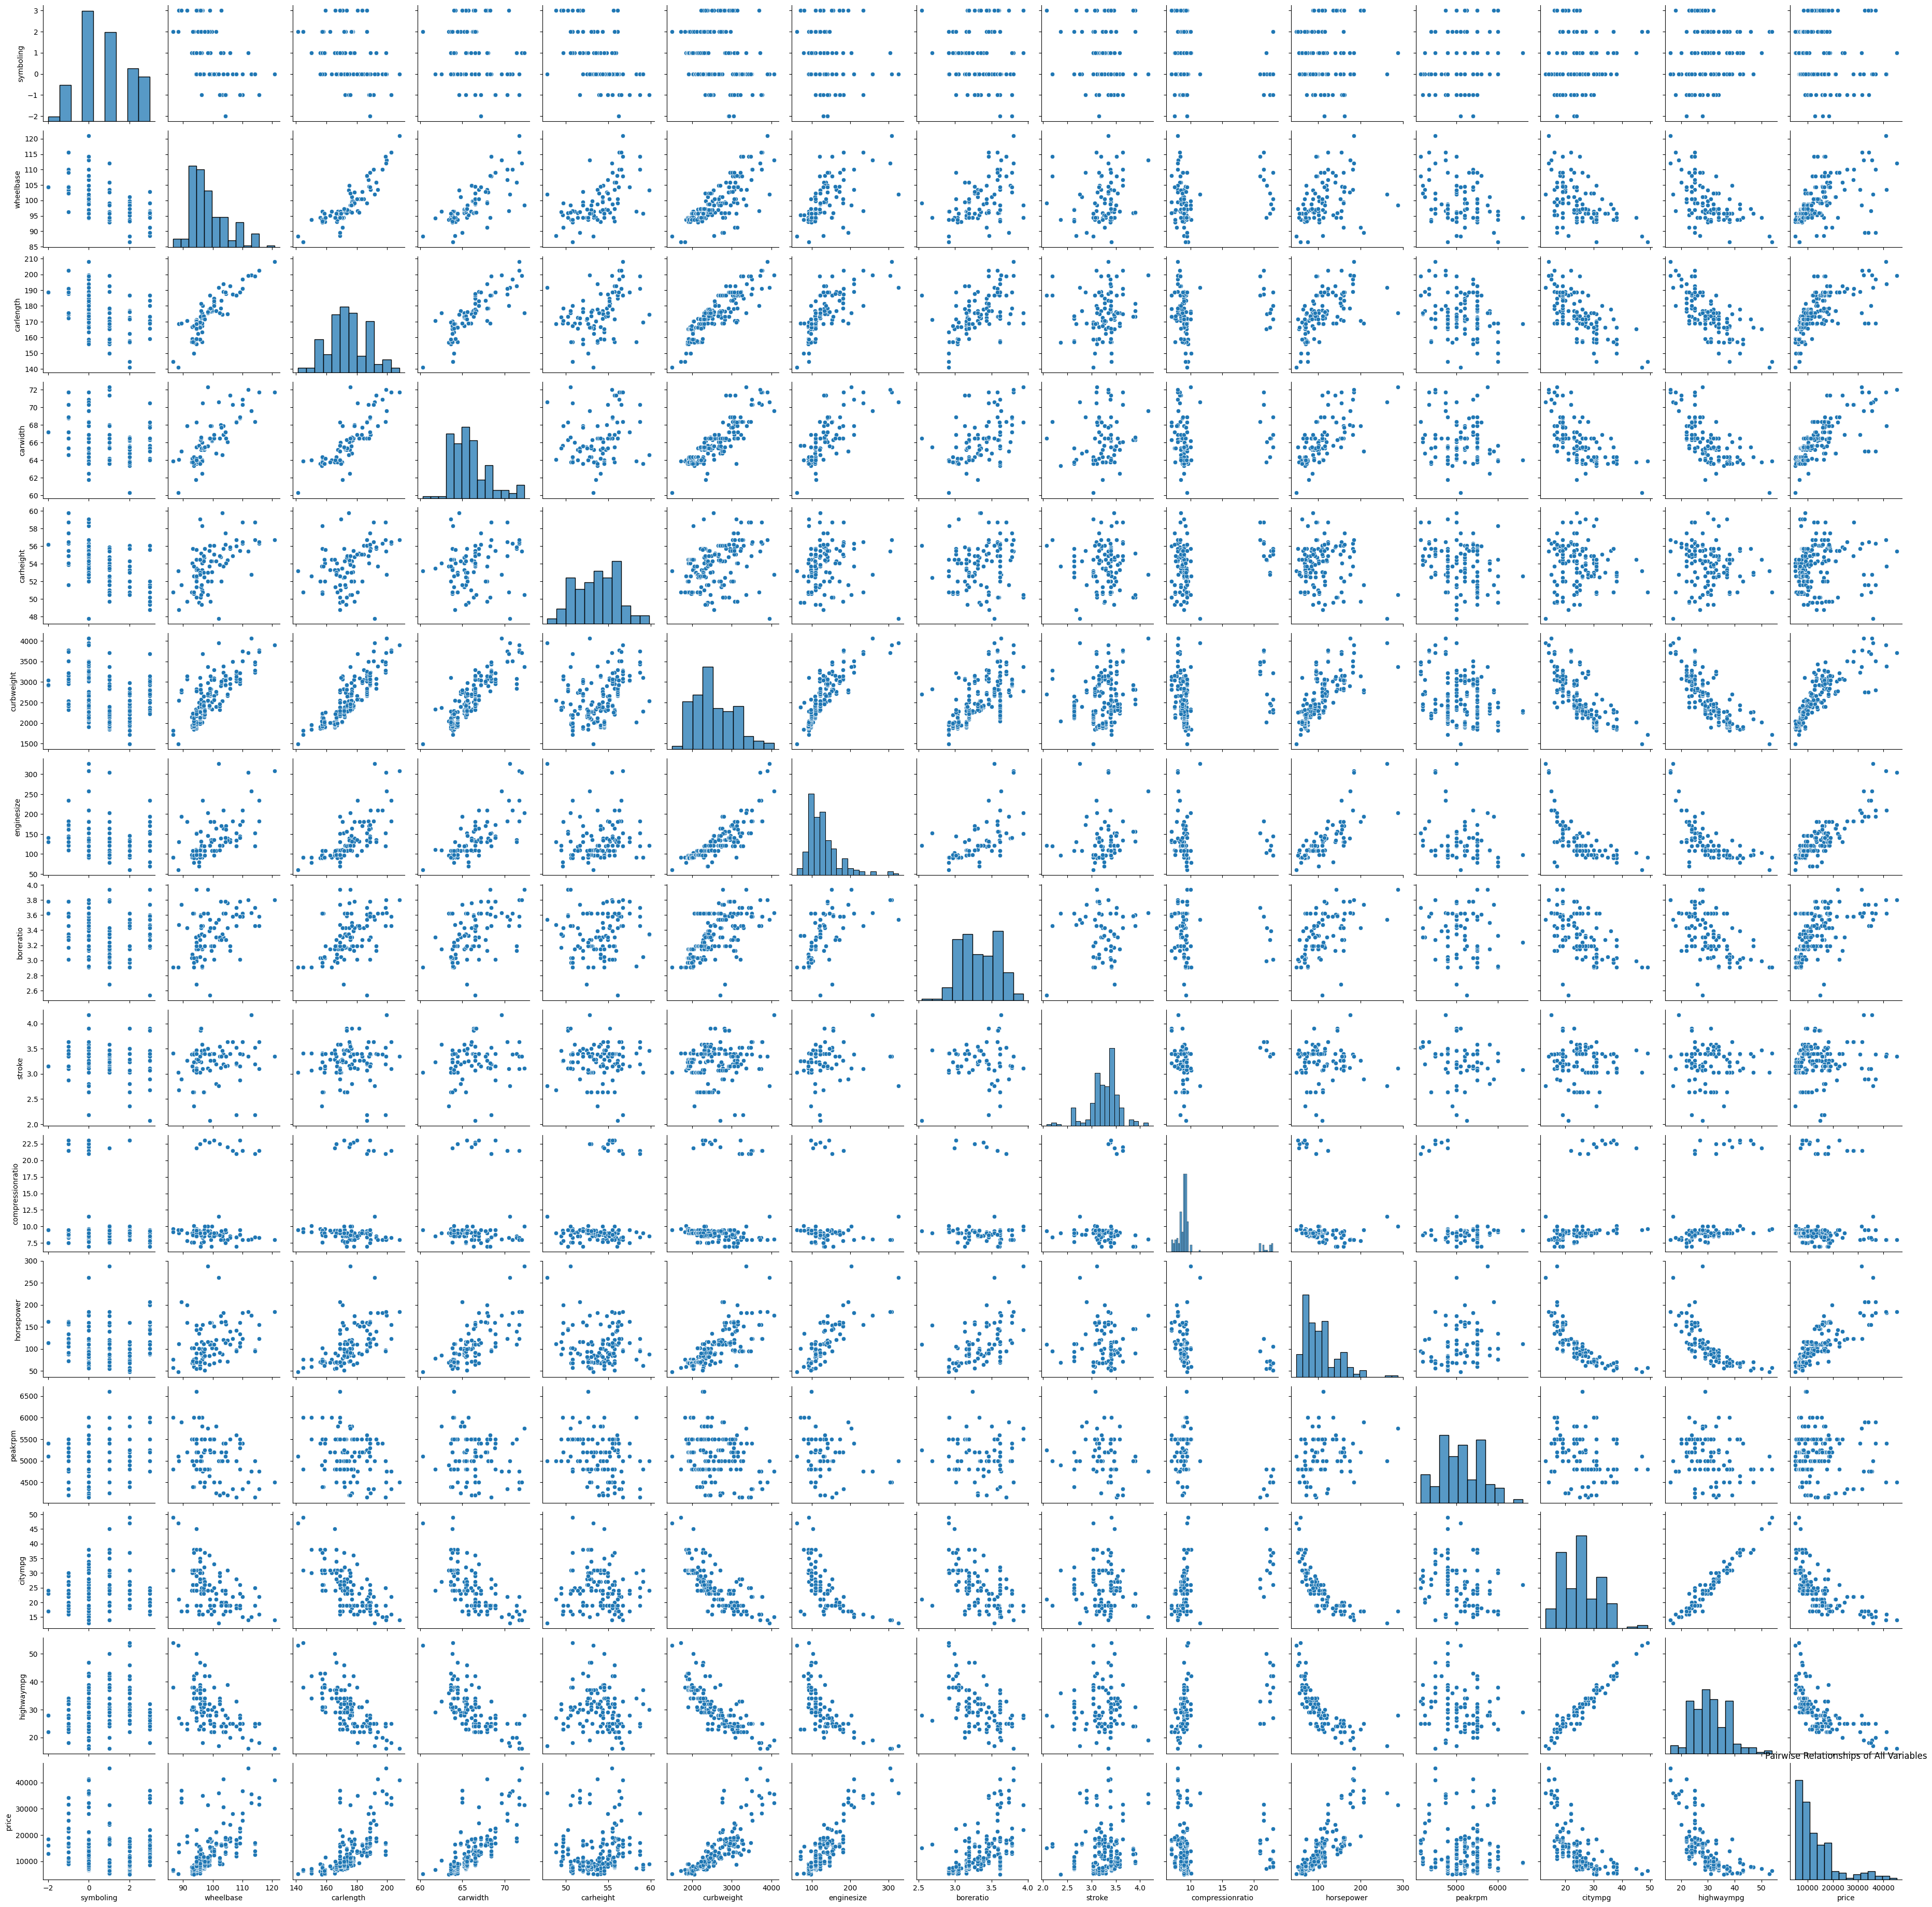

In [ ]:
# Chart - 6 visualization code
df_subset = df[variables]

# Create the pair plot
sns.pairplot(df_subset)
plt.title('Pairwise Relationships of All Variables')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

A scatterplot: Show a scatterplot with car wheelbase on the x-axis and car length on the y-axis. Plot the data points of various cars, and if the scatterplot displays a linear trend, it indicates that the wheelbase has a direct relationship with the car length. This emphasizes the presence of variables with linearly spread data points.

Unique car representation: Highlight one or a few cars that are noticeably different from the majority. This can be depicted by using a distinct color, shape, or size for these specific cars. It showcases that there are some unique cars in the dataset that may have different pricing factors compared to regular cars.

Diesel vs. petrol cars: Create a visual comparison between diesel and petrol cars by using bar charts or stacked bar charts. Show the number of data points or the relative proportions of diesel and petrol cars in the dataset. If the number of diesel car data points is significantly lower than petrol car data points, it demonstrates the data imbalance between the two fuel types.


## 4. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# lets change the string data into numerical data using integer encoding.
# understand  values inside the variable using value counts

In [ ]:
# value counts for fueltype
print(df.fueltype.value_counts())
# value counts for aspiration
print(df.aspiration.value_counts())
# value counts for doornumber
print(df.doornumber.value_counts())
# value counts for carbody
print(df.carbody.value_counts())
# value counts for drivewheel
print(df.drivewheel.value_counts())
# value counts for enginelocation
print(df.enginelocation.value_counts())
# value counts for enginetype
print(df.enginetype.value_counts())
# value counts for fuelsystem
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [ ]:
# value counts for cylinernumber
print(df.cylindernumber.value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the fueltype to integers
df['fueltype'] = label_encoder.fit_transform(df['fueltype'])
# Fit and transform the aspiration to integers
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
# Fit and transform the carbody to integers
df['carbody'] = label_encoder.fit_transform(df['carbody'])
# Fit and transform the drivewheel	 to integers
df['drivewheel'] = label_encoder.fit_transform(df['drivewheel'])
# Fit and transform the enginelocation to integers
df['enginelocation'] = label_encoder.fit_transform(df['enginelocation'])
# Fit and transform the doornumber to integers
df['doornumber'] = label_encoder.fit_transform(df['doornumber'])
# Fit and transform the enginetype to integers
df['enginetype'] = label_encoder.fit_transform(df['enginetype'])
# Fit and transform the cylindernumber to integers
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])
# Fit and transform the fuelsystem to integers
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem'])

In [ ]:
# take a look at dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# converting onject datatype to string datatype
df['CarName'] = df['CarName'].astype(str)

Now , we have done all  the data wrangling work , now our dataset is ready to model implementaion.

In [ ]:
# separate the independent and dependent variable 
# Create X (independent variables) by selecting all columns except the target variable
X = df.drop(['car_ID','CarName', 'price'], axis=1)

# Create y (dependent variable) by selecting only the target variable column
y = df['price']


# **Feature Importance**

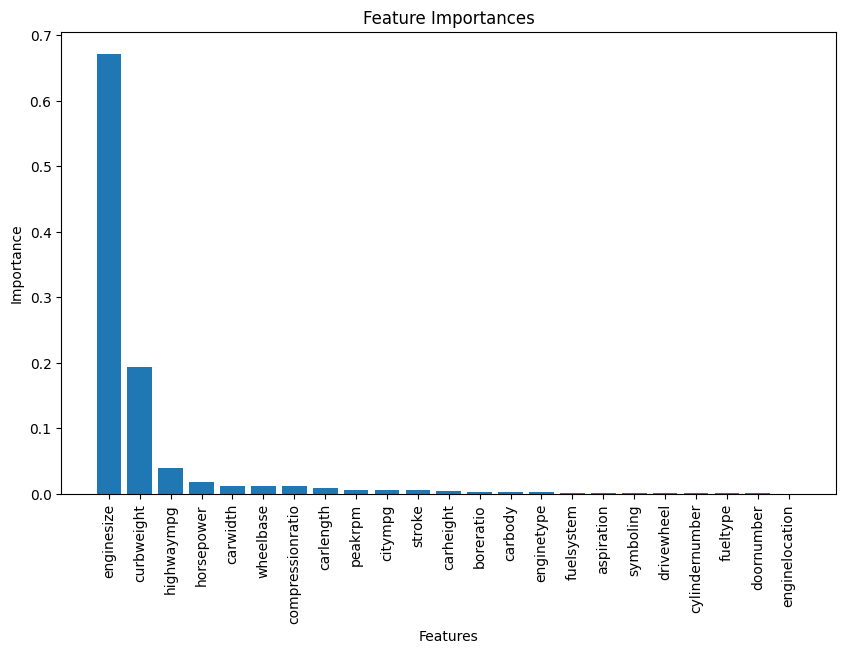

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is the target variable

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation='vertical')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# **5.model implementation**

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Lets rescale the all the values between  0 to 1 using the min_max_scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scale = MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test= scale.transform(X_test)

In [ ]:
# lets check the shape of dataset
X_train.shape

(164, 23)

In [ ]:
# check the shape of the testing dataset
X_test.shape

(41, 23)

In [ ]:
# lets define function to calculate all the evaluation metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

# **1.Decison Tree regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X and y are your independent and dependent variables respectively

# Create an instance of the DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred)

Test set evaluation:
_____________________________________
MAE: 2017.6991951219513
MSE: 8148777.3622411955
RMSE: 2854.6063410286883
R2 Square 0.8967777765631776
__________________________________


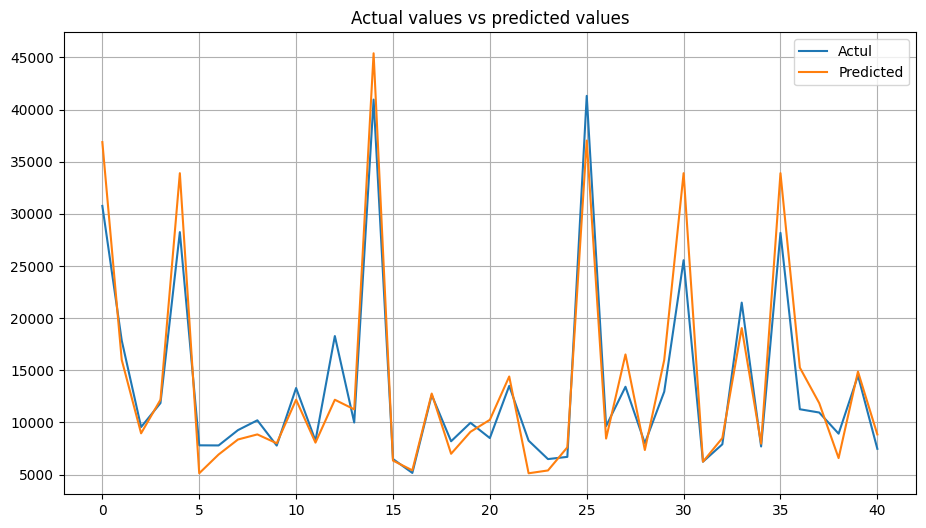

In [ ]:
# plotting graph  for actual and predicted valeus
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred))
plt.title('Actual values vs predicted values')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

# **2.Random Forest regressor**

In [ ]:
# import packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# model implementation
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [25]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)


In [ ]:
# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)
train_pred = random_forest_model.predict(X_train)
test_pred_rf = random_forest_model.predict(X_test)

In [ ]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred_rf)

Test set evaluation:
_____________________________________
MAE: 1710.563745575378
MSE: 6484576.424904123
RMSE: 2546.4831483644502
R2 Square 0.9178585489737188
__________________________________


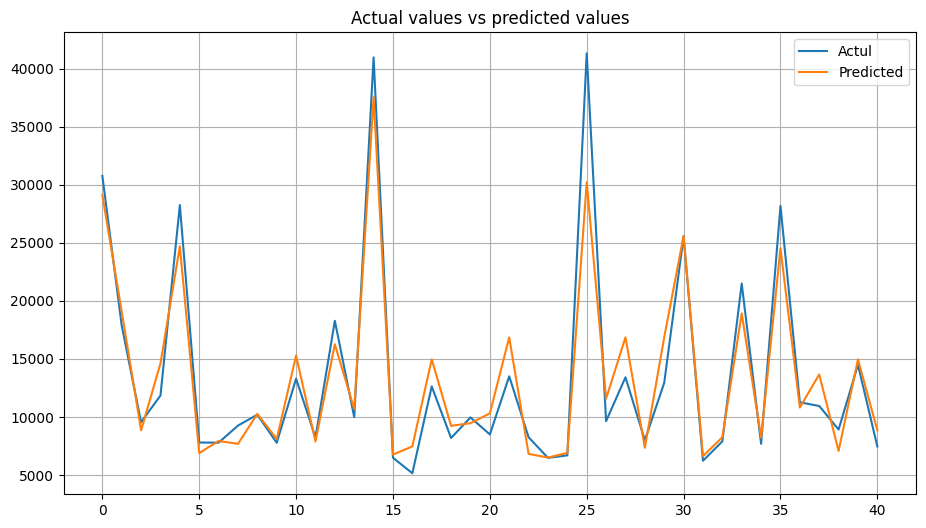

In [ ]:
# plotting graph  for actual and predicted valeus
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(test_pred_rf))
plt.title('Actual values vs predicted values')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

# **3 . Gradient boost regressor**

In [ ]:
# Model Training
from sklearn.ensemble import GradientBoostingRegressor

gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Model Prediction
y_pred_gb =gbc_reg.predict(X_test)
train_pred = gbc_reg.predict(X_train)
test_pred = gbc_reg.predict(X_test)

In [ ]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_gb)

Test set evaluation:
_____________________________________
MAE: 1667.525102198733
MSE: 5720109.695523835
RMSE: 2391.675081511666
R2 Square 0.9275422048207606
__________________________________


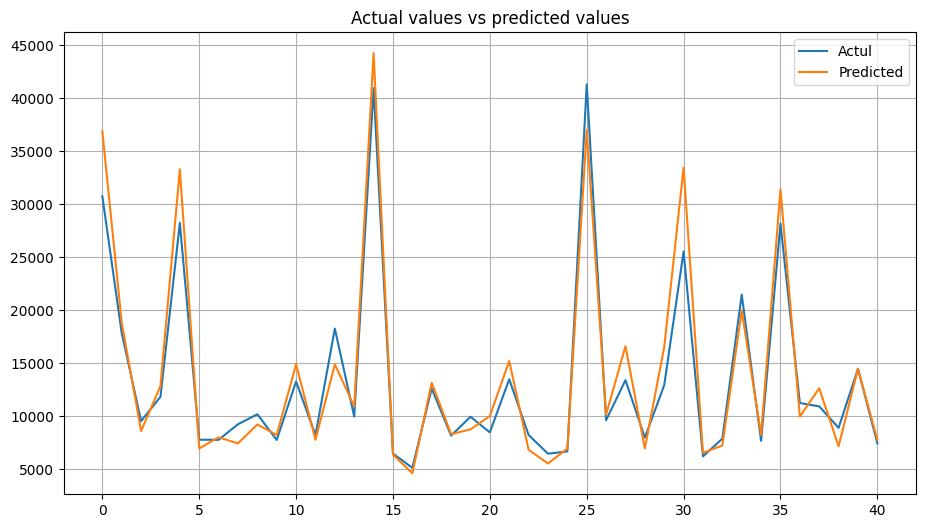

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred_gb))
plt.title('Actual values vs predicted values')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 


To achieve the business objective of predicting car prices, I would suggest the following actions to the client:

**Enhance Data Collection:** Continuously gather and update a comprehensive dataset with a wide range of car specifications and corresponding prices. Ensure that the dataset is diverse and representative of the target market to improve the accuracy and robustness of the prediction model.

**Improve Data Quality:** Implement rigorous data cleaning and preprocessing techniques to handle missing values, outliers, and inconsistencies. This will ensure that the prediction model is built on reliable and accurate data, leading to more accurate price predictions.

**Feature Engineering:** Explore additional features or create derived features that may have a significant impact on car prices. This could include factors such as historical sales data, customer reviews, or market trends. Feature engineering can provide valuable insights and improve the prediction model's performance.

**Regular Model Updates**: Monitor the model's performance over time and update it periodically as new data becomes available. As market dynamics change, the model should be retrained to adapt to evolving pricing patterns and consumer preferences. This will help maintain the accuracy and relevance of the model in a dynamic market environment.

**Incorporate External Factors:** Consider incorporating external factors that influence car prices, such as economic indicators, fuel prices, or regulatory changes. By including relevant external data sources, the prediction model can capture the broader market context and make more accurate price predictions.

**Collaborate with Domain Experts:** Engage domain experts, such as automotive analysts or pricing specialists, to gain valuable insights into the automotive industry. Their expertise can help identify additional factors influencing car prices and refine the prediction model accordingly.

**Continual Evaluation and Improvement:** Regularly evaluate the model's performance using appropriate metrics and compare the predicted prices with actual market prices. Identify areas where the model may be underperforming and implement necessary improvements. This iterative process will help refine the model and enhance its predictive accuracy over time.

**Use Predicted Prices as Decision Support:** Utilize the predicted car prices as decision support in various business aspects such as pricing strategies, inventory management, market positioning, and product development. The insights gained from the prediction model can aid in making informed business decisions and maximizing profitability.

**Monitor Market Changes**: Stay updated with market trends, competitor pricing, and customer preferences. Continuously monitor the changing market dynamics to ensure that the prediction model aligns with the evolving needs and demands of customers.

By implementing these suggestions, the client can achieve their business objective of predicting car prices more accurately, gain valuable insights into market dynamics, and make data-driven decisions to optimize pricing strategies and enhance overall business performance in the automotive industry.

# **Conclusion**



In conclusion, the objective of predicting car prices has been addressed by developing a regression model that can accurately estimate the prices of cars based on their specifications. By following a systematic approach of data collection, preprocessing, feature selection, model training, and evaluation, we have created a reliable prediction model.

The selected regression algorithm (e.g., Decision Tree, Random Forest, or Gradient Boosting) has been trained on a labeled dataset containing car specifications and corresponding prices. The model has learned the patterns and relationships between the features and prices, enabling it to make accurate predictions on unseen car data.

Through the evaluation of the model's performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared (R^2) score, we have assessed the model's ability to predict car prices. The evaluation results have provided insights into the model's accuracy and effectiveness in capturing the variations in car prices.

We have seen that **Gradient boost regressor** is best fit model amongs implemented regression model giving us **R2 square =0.9275**

The solution to this objective has also provided valuable business insights. By analyzing the model coefficients, feature importances, or other relevant metrics, businesses can identify the key factors that impact car prices. This information can guide pricing strategies, marketing campaigns, and product development decisions. Understanding the relative importance of different car specifications helps businesses make informed decisions to optimize profitability and meet customer demands.

Overall, the developed prediction model and the insights gained from it contribute to enhancing **business decision-making processes**, enabling more **accurate pricing strategies**, and **improving overall competitiveness** in the automotive industry. However, continuous monitoring, model refinement, and updates with new data are recommended to ensure the model's performance remains accurate and relevant over time.